In [1]:
#Importing required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import folium
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import keras_tuner as kt

In [2]:
#Setting up the directory to download data
os.chdir('C:/Users/xeb15154/OneDrive - University of Strathclyde/Data Science Projects/')

In [3]:
#Downloading excel file in a pandas dataframe format
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Evaluating the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Checking for missing data
print(df.isnull().values.any()) #No missing data therefore we can move forward

False


In [6]:
#Checking for duplicates
print(df.duplicated().sum())

0


In [7]:
#Changing the date column to appropriate times
# Convert to datetime:
df['date'] = pd.to_datetime(df['date'], format="%Y%m%dT%H%M%S")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


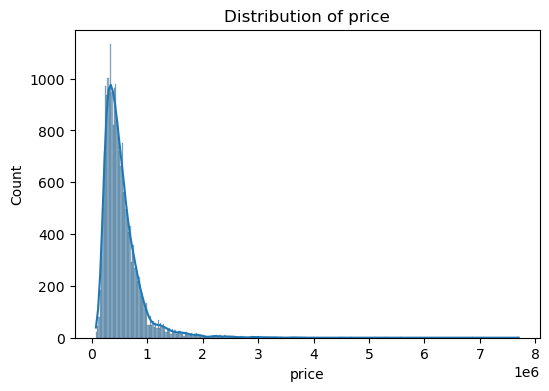

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


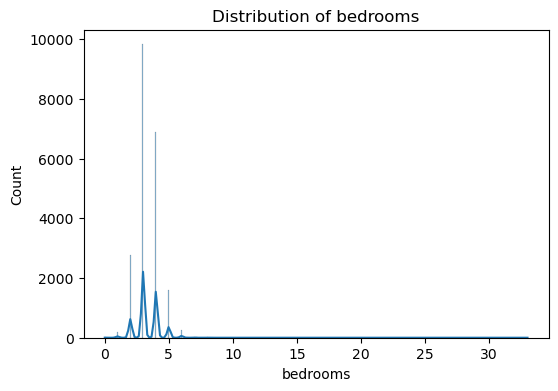

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


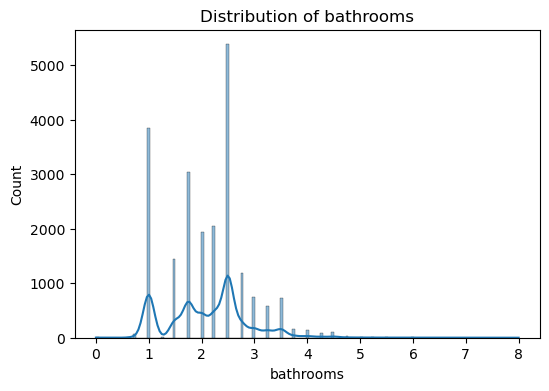

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


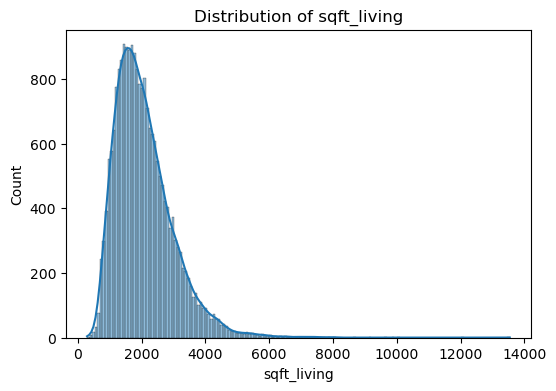

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


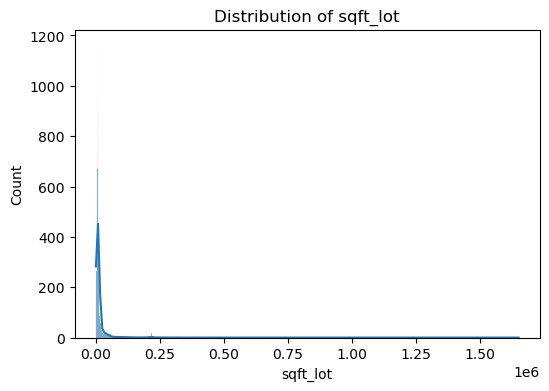

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


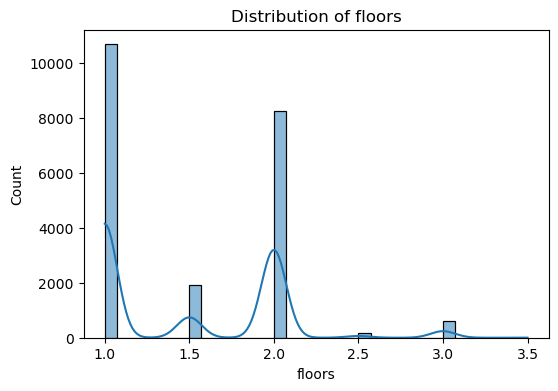

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


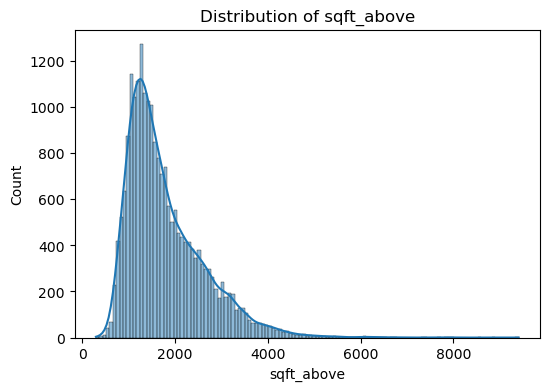

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


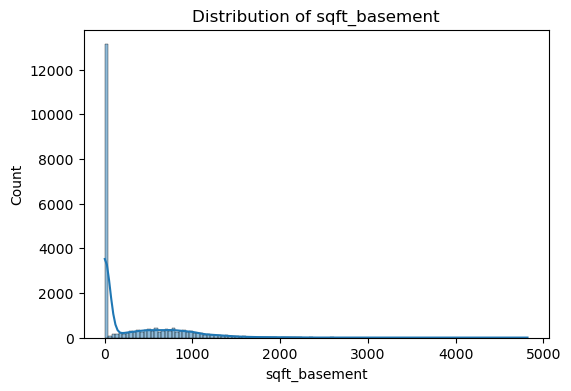

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


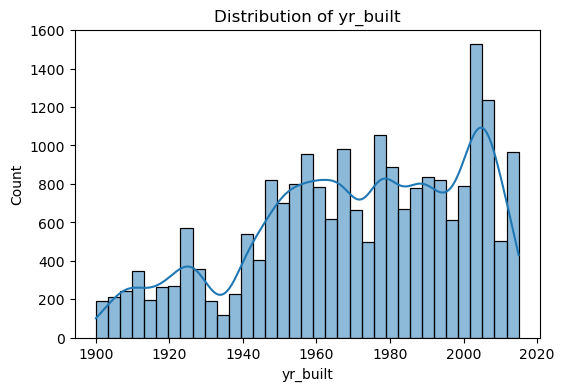

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


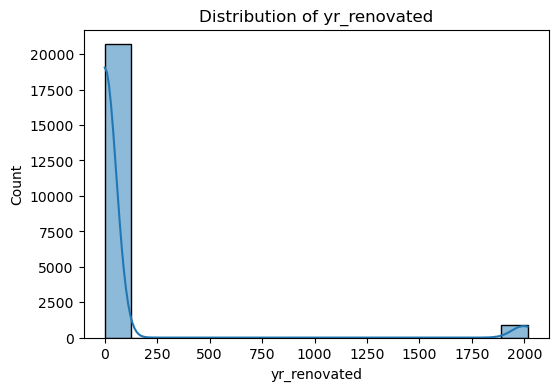

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


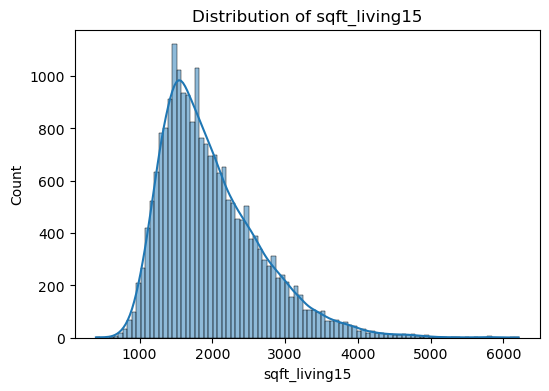

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


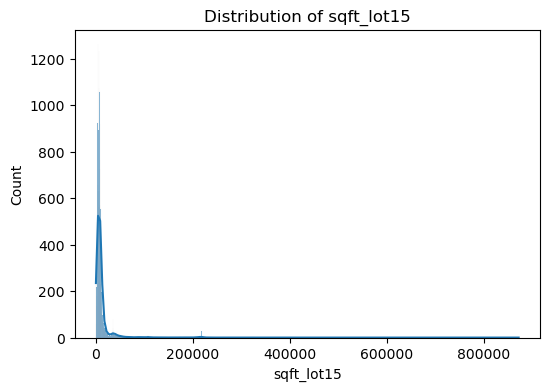

KeyError: 'year'

<Figure size 600x400 with 0 Axes>

In [9]:
#Histograms
numerical_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                      'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                      'yr_renovated', 'sqft_living15', 'sqft_lot15', 'year']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

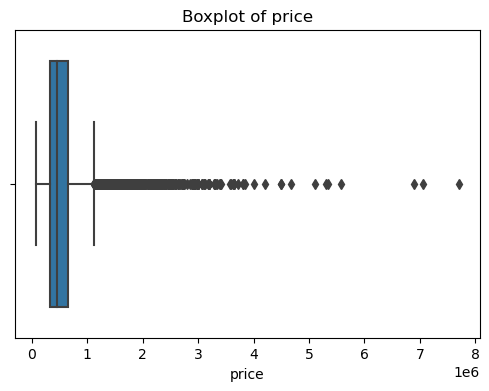

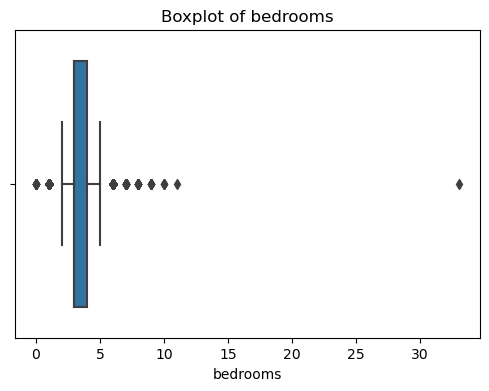

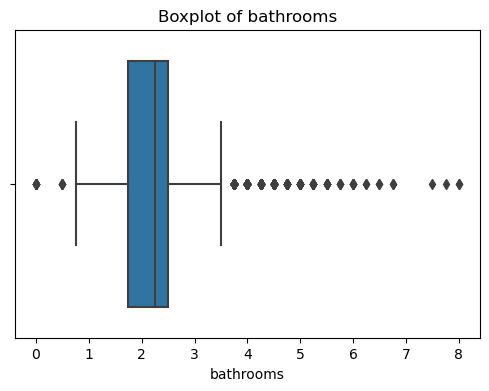

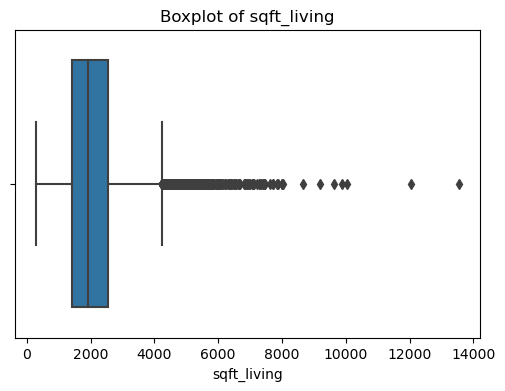

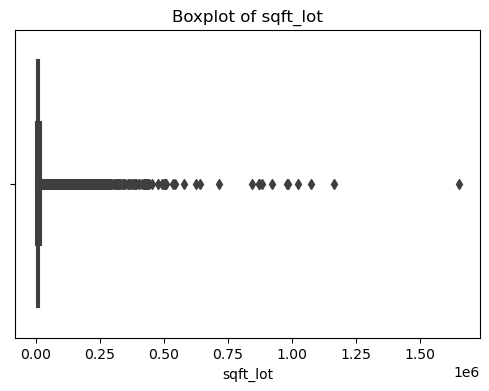

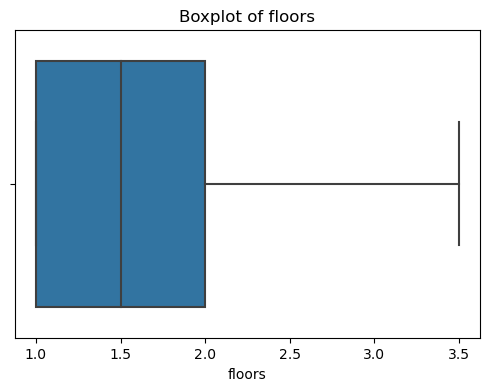

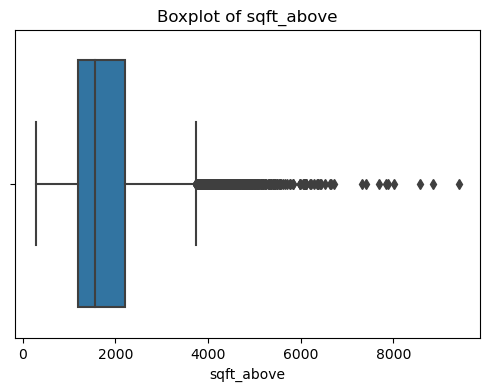

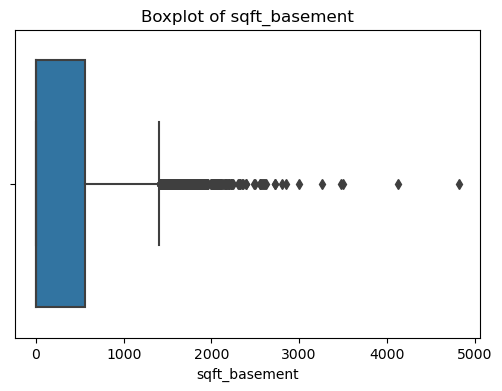

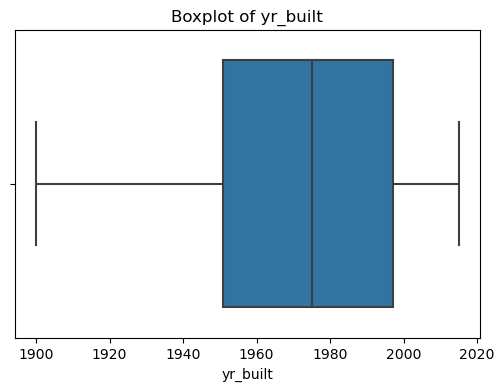

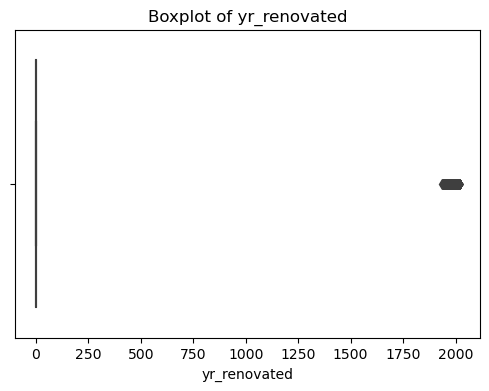

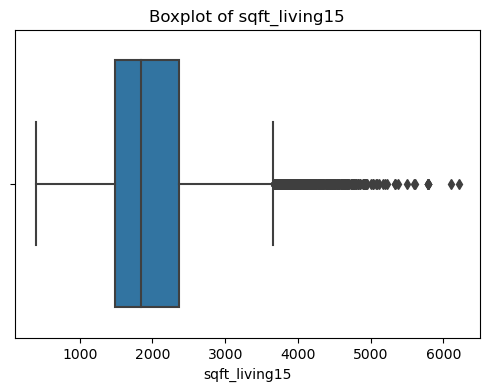

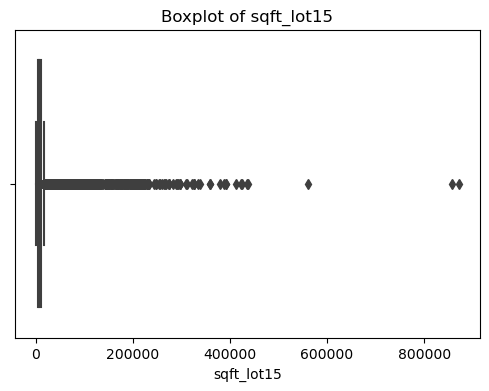

KeyError: 'year'

<Figure size 600x400 with 0 Axes>

In [10]:
#Creating boxplots to detect outliers

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

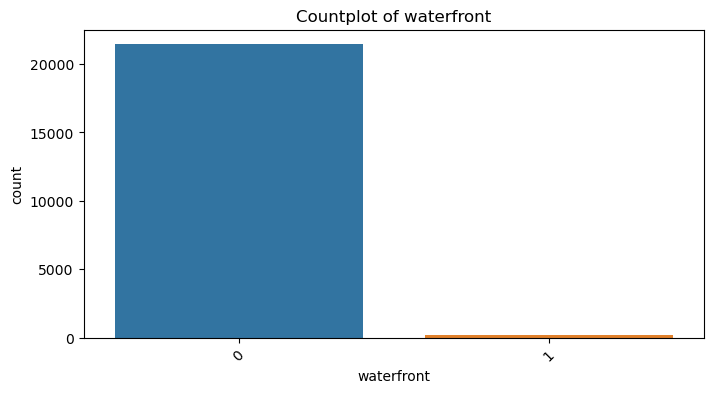

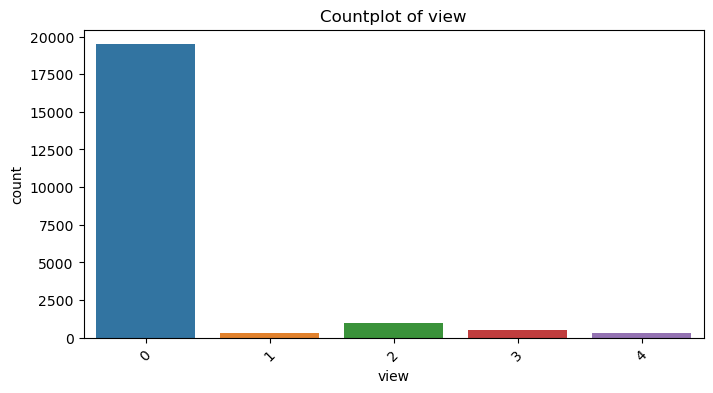

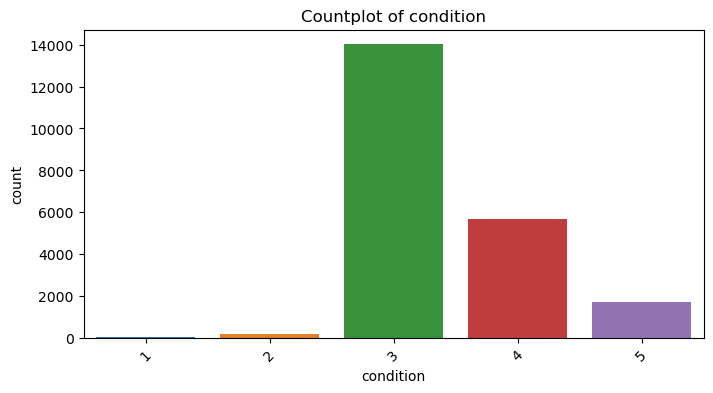

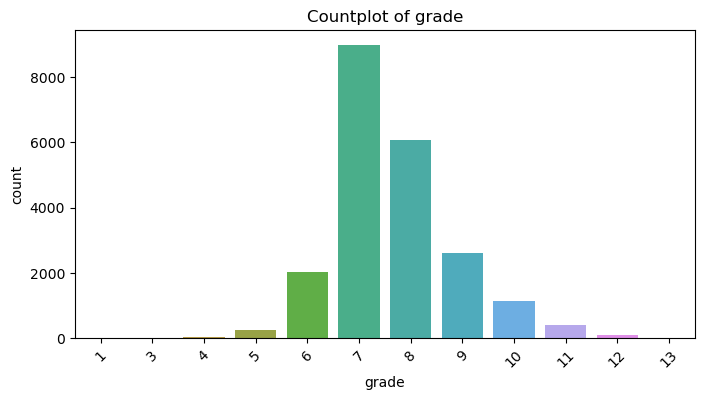

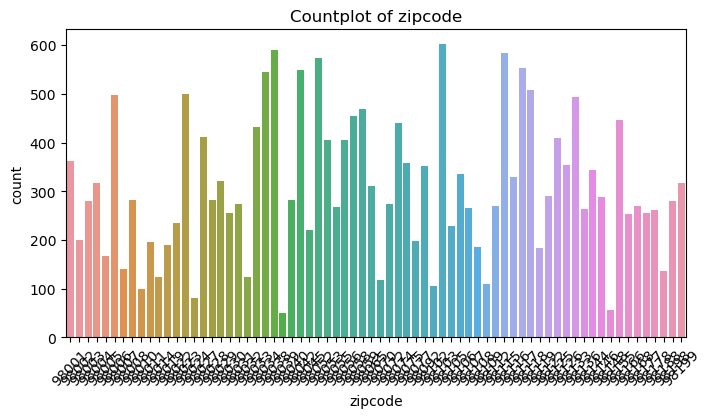

In [11]:
#Count plots
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

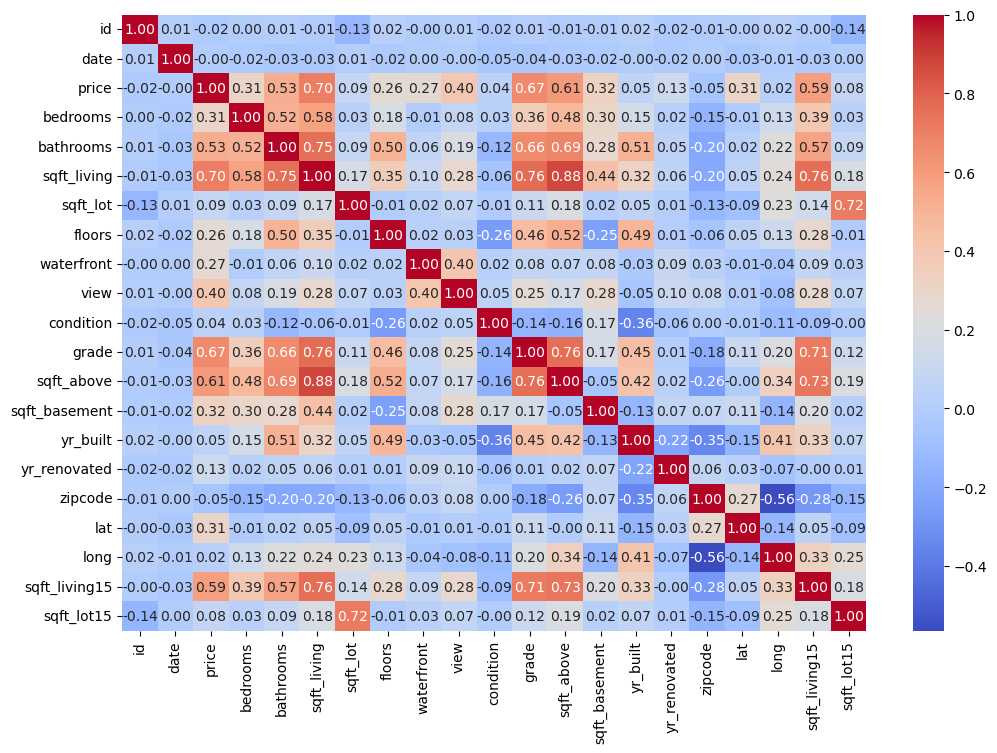

In [12]:
#Correlation heatmap among variables

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [13]:
#Checking each variables correlation with the target variable
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

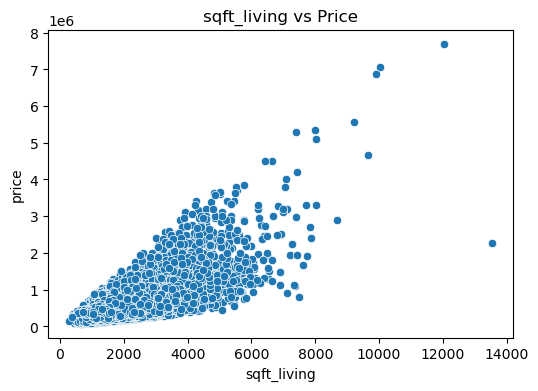

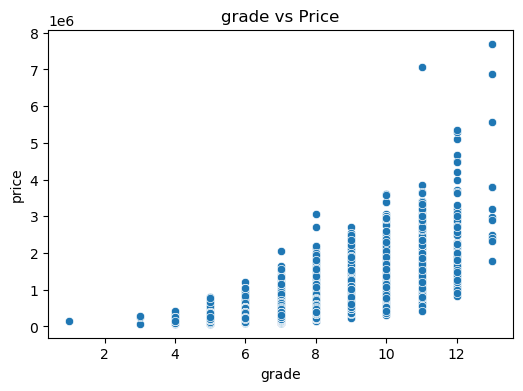

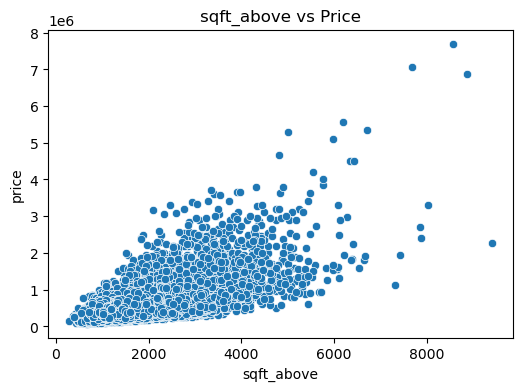

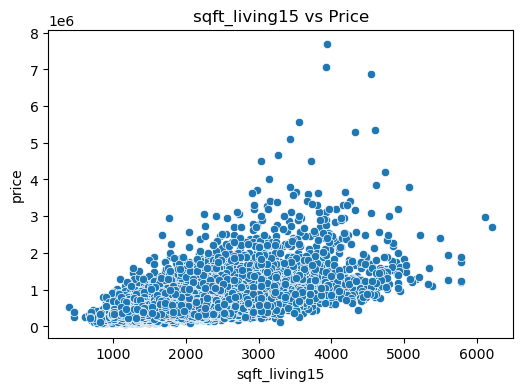

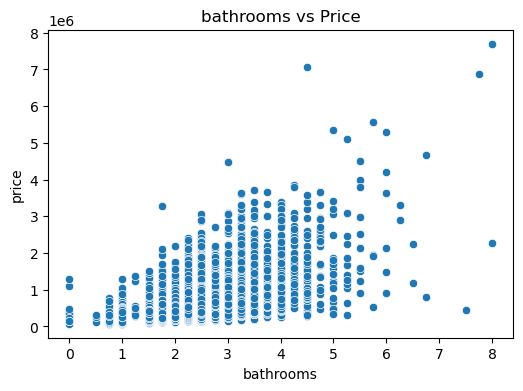

In [14]:
#Scatter plots for key variables (above 0.5 correlation)
key_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

for col in key_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.show()


## Map of properties/ prices

In [15]:
# Start map centered at median lat/long
m = folium.Map(location=[df['lat'].median(), df['long'].median()], zoom_start=10)

# Add points to map
for _, row in df.sample(500).iterrows():  # sample to avoid too many points
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Price: ${row['price']:,}"
    ).add_to(m)
    
m.save("house_prices_map.html")

## Feature Engineering

In [16]:
# Creating new features based on the data we already have that I think may be useful for prediction

df['month_sold'] = df['date'].dt.month #creating a variable for month sold
df['year_sold'] = df['date'].dt.year #creating a variable for year sold
df['house_age'] = df['year_sold'] - df['yr_built'] #creating a variable for house age
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1) #creating a categorical variable indicating if the if the property has been renovated

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,house_age,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,10,2014,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,12,2014,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2,2015,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,12,2014,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2,2015,28,0


## Dealing with outliers

In [18]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_outrem = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]
print(df.shape)
print(df_outrem.shape) #We have removed 1146 rows of data that are considered outliers

(21613, 25)
(20467, 25)


## House price distribution

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x500 with 0 Axes>

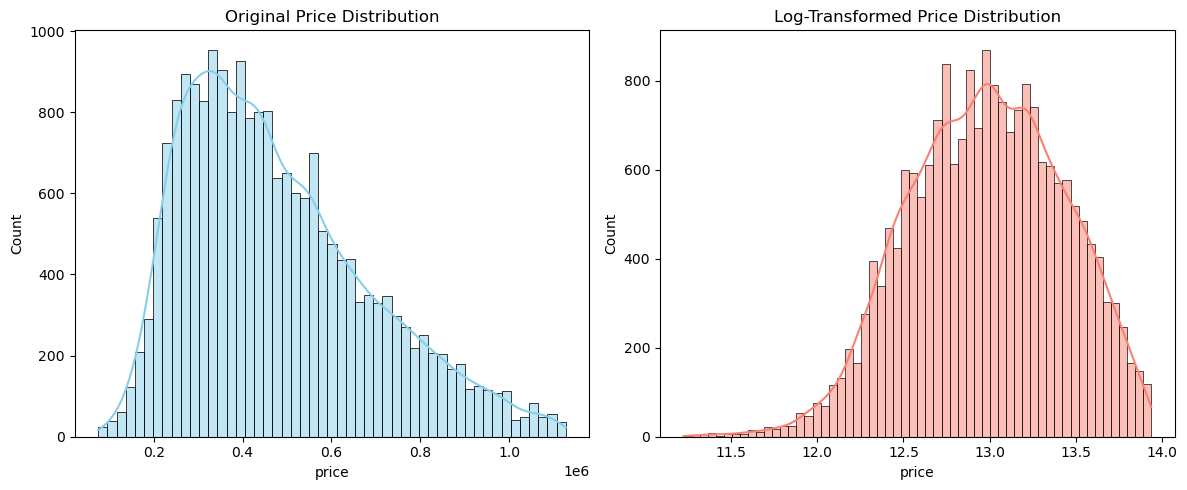

In [19]:
# Creating a histogram of price vs log transformed price to identify any skewness
plt.figure(figsize=(12,5))

# Create 1 row, 2 columns of plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Histogram of original price
sns.histplot(df_outrem['price'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original Price Distribution')

# Histogram of log-transformed price
sns.histplot(np.log(df_outrem['price']), kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Log-Transformed Price Distribution')

plt.tight_layout()
plt.show()

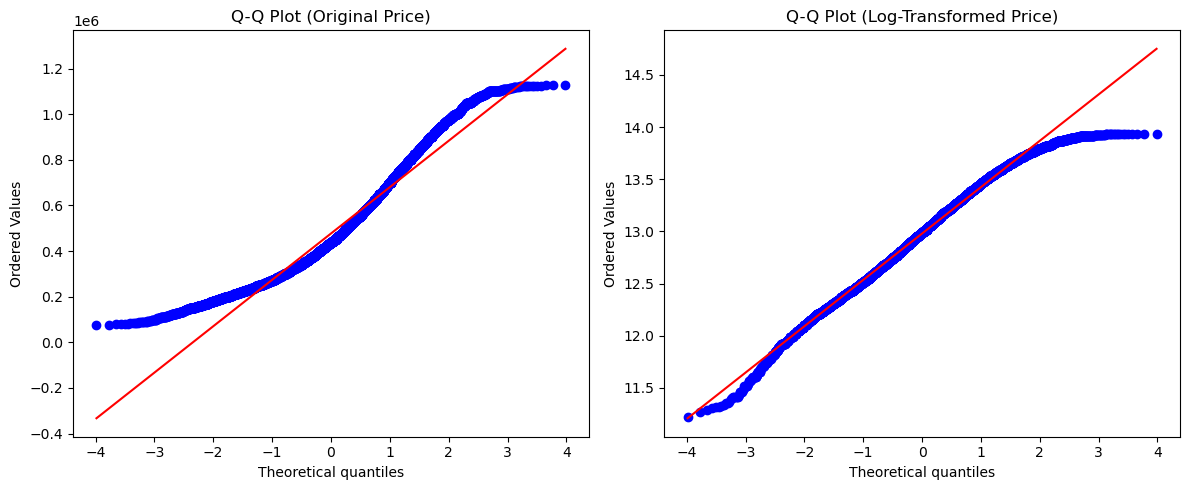

In [20]:
#Using a Q-Q plot to visiually analyse whether the log transformation provides a more normal distribution -  looks like it does!
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(df_outrem['price'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot (Original Price)')

stats.probplot(np.log(df_outrem['price']), dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Log-Transformed Price)')

plt.tight_layout()
plt.show()

In [21]:
#complete a statistical analysis to prove the log transformation is more normally distributed. Shapiro-wilk test does not suit
#testing for normality in this case as there is a large sample size. Therefore, we are using 

#from scipy.stats import normaltest

#k2_orig, p_orig = normaltest(df_outrem['price'])
#k2_log, p_log = normaltest(np.log(df_outrem['price']))

#print("Original Price p-value:", p_orig)
#print("Log-Transformed Price p-value:", p_log)

## Feature relationships and multicolinearity

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

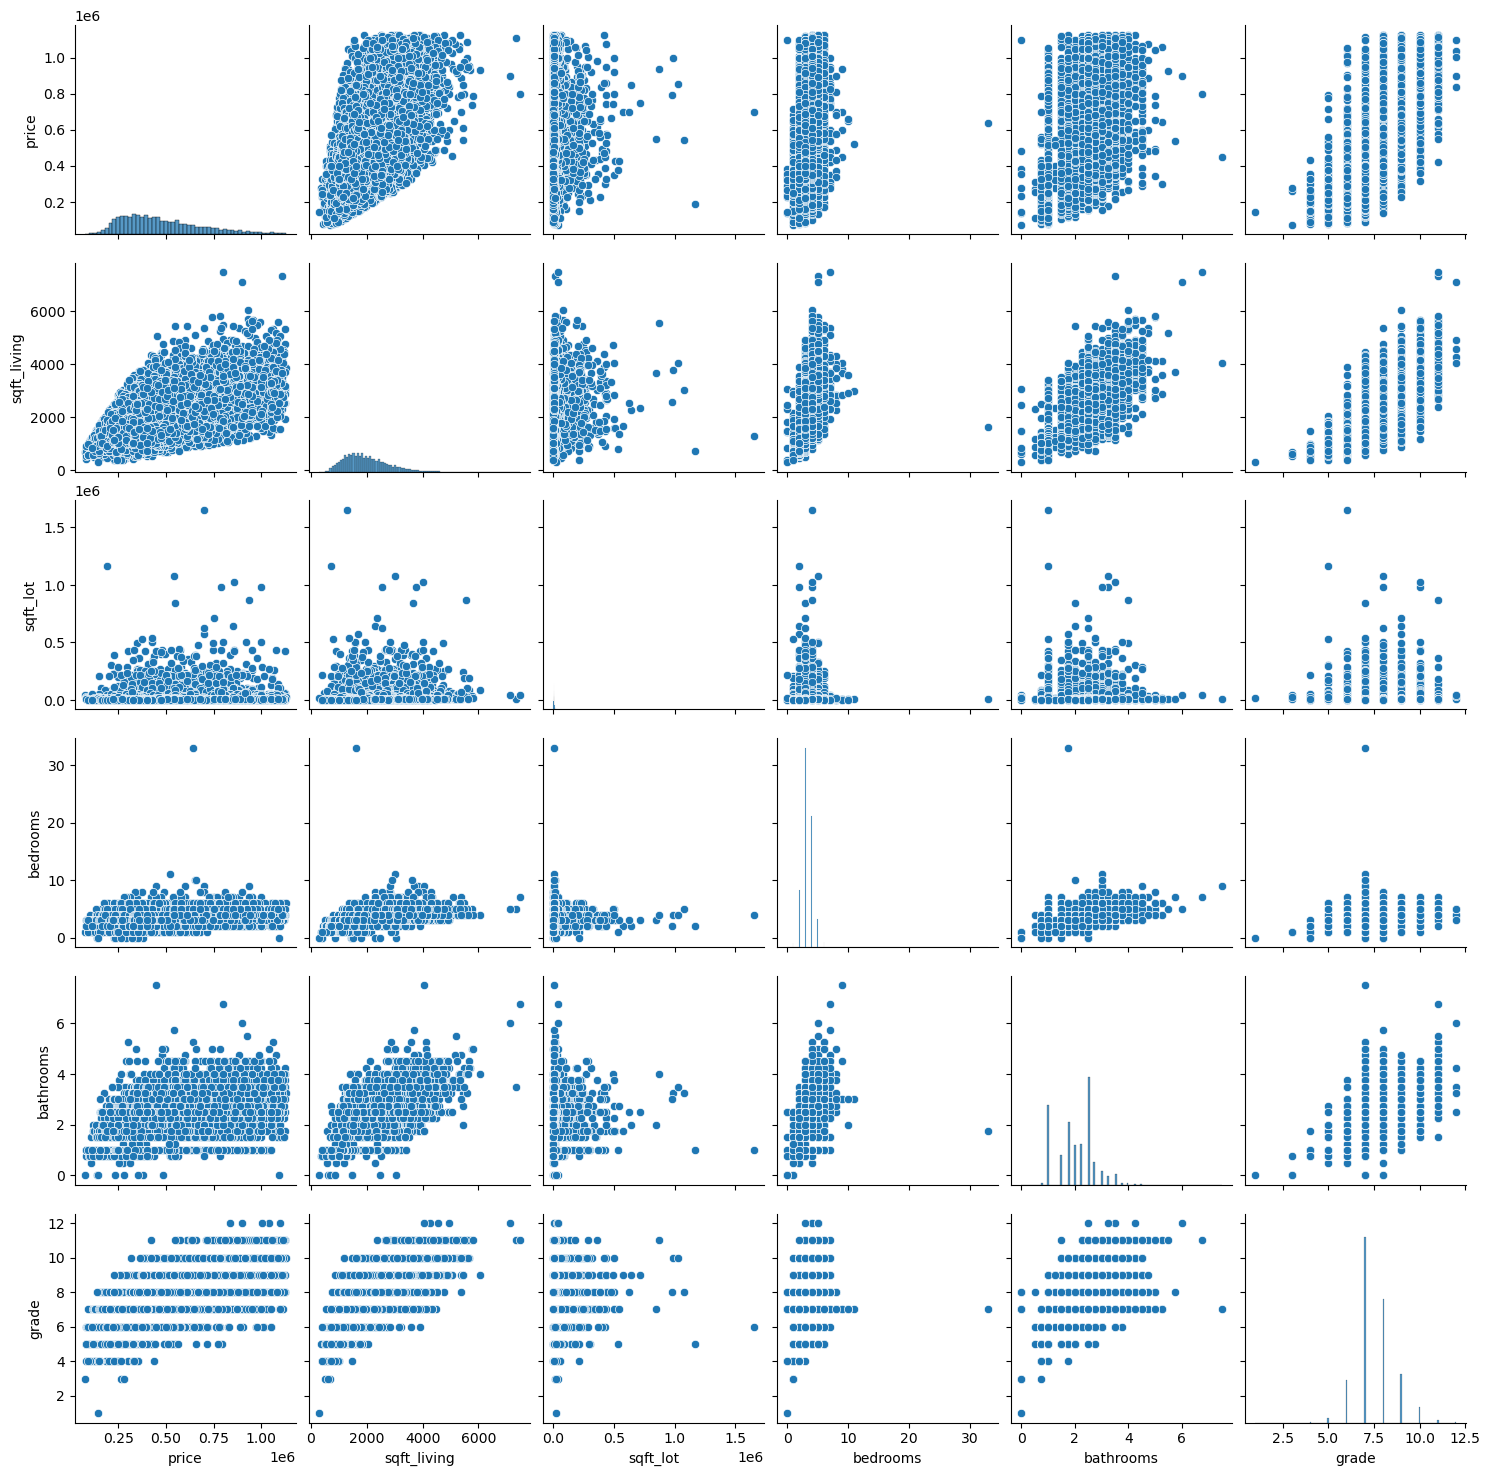

In [22]:
sns.pairplot(df_outrem[['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade']])
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

columns_list = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15',
    'month_sold',
    'year_sold',
    'house_age',
    'renovated'
]

X = df_outrem[columns_list].drop('price', axis=1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         features           VIF
0        bedrooms  2.379868e+01
1       bathrooms  2.829077e+01
2     sqft_living           inf
3        sqft_lot  2.320567e+00
4          floors  1.775865e+01
5      waterfront  1.111389e+00
6            view  1.324067e+00
7       condition  3.553387e+01
8           grade  1.521249e+02
9      sqft_above           inf
10  sqft_basement           inf
11       yr_built           inf
12   yr_renovated  1.558039e+04
13        zipcode  5.255263e+06
14            lat  1.352004e+05
15           long  1.357236e+06
16  sqft_living15  3.034568e+01
17     sqft_lot15  2.546286e+00
18     month_sold  6.196290e+00
19      year_sold           inf
20      house_age           inf
21      renovated  1.557915e+04


In [24]:
#Now we need to remove variables that are highly correlated to one another to remove noise when training the model

clean_features = ['price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'grade',
    'yr_built',
    'yr_renovated',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15',
    'month_sold'
]

In [25]:
#creating a new df that only contains the above features
df_clean = df_outrem[clean_features].copy()
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1955,0,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,1951,1991,47.7210,-122.319,1690,7639,12
2,180000.0,2,1.00,770,10000,1.0,0,0,6,1933,0,47.7379,-122.233,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1965,0,47.5208,-122.393,1360,5000,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1987,0,47.6168,-122.045,1800,7503,2


In [26]:
#from our above analysis we are going to log transform the target column price
df_clean['price'] = np.log(df_clean['price'])
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold
0,12.309982,3,1.00,1180,5650,1.0,0,0,7,1955,0,47.5112,-122.257,1340,5650,10
1,13.195614,3,2.25,2570,7242,2.0,0,0,7,1951,1991,47.7210,-122.319,1690,7639,12
2,12.100712,2,1.00,770,10000,1.0,0,0,6,1933,0,47.7379,-122.233,2720,8062,2
3,13.311329,4,3.00,1960,5000,1.0,0,0,7,1965,0,47.5208,-122.393,1360,5000,12
4,13.142166,3,2.00,1680,8080,1.0,0,0,8,1987,0,47.6168,-122.045,1800,7503,2


## Training models

In [27]:
##Baseline: Linear Regression → Ridge → Lasso

##Tree-based: Random Forest → XGBoost → LightGBM

##Advanced: CatBoost or Neural Nets if you want to experiment further

##Evaluate using cross-validation with metrics like RMSE, MAE, and R².

## Data Preperation

In [28]:
#Setting up the data so that it is in the correct format for training models
#defining data for train and test sets

X = df_clean.drop(['price'], axis=1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

## Evaluation metric

In [29]:
#evaluting accuracy - MAE = average absolute error (smaller = better) // RMSE = penalizes large errors (smaller = better)
# // R² → proportion of variance explained (closer to 1 = better)
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")

### Linear Regression

In [30]:
#Linear regression is a statistical method that uses a straight line to model the relationship between a dependent variable and one or more independent variables
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
#making predictions
linear_regression_pred = linear_regression.predict(X_test)

In [32]:
#evaluating model
evaluate_model(y_test, linear_regression_pred)

MAE: 0.190
RMSE: 0.244
R²: 0.698


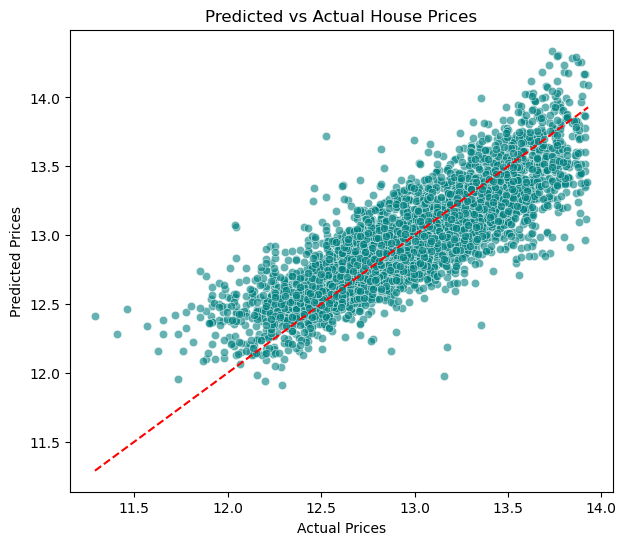

In [33]:
#PLotting the linear regressions predictions. Using a parity plot we can visualise the models accuracy 
#Points close to the red dashed line = good predictions 
#Points above the line = model underestimates price.
#Points below the line = model overestimates price.
#A tight, diagonal cluster means a strong, consistent model.)

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=linear_regression_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()


### Ridge

In [34]:
#Ridge regression is a linear regression technique that reduces overfitting and multicollinearity by adding an L2-norm penalty to the squared magnitude of coefficients, effectively shrinking them towards zero but not to zero
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [35]:
#making predictions
ridge_pred = ridge.predict(X_test)

In [36]:
#evaluating performance
evaluate_model(y_test, ridge_pred)

MAE: 0.190
RMSE: 0.244
R²: 0.698


### Random Forrest

In [37]:
#A random forest regression model combines multiple decision trees into a single ensemble. Each tree is built from a different subset of the data and makes an independent prediction. The final output is determined by averaging or taking a weighted average of all the trees' predictions.
rf = RandomForestRegressor(
    n_estimators=200, 
    max_depth=20, 
    random_state=42, 
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf)

Random Forest Performance:
MAE: 0.120
RMSE: 0.169
R²: 0.855


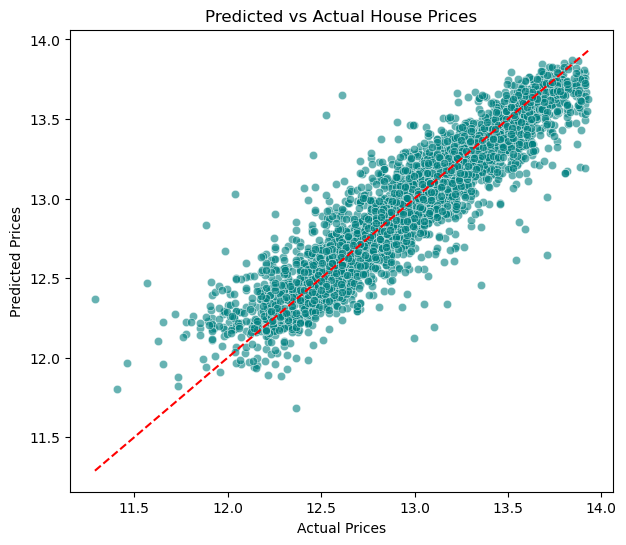

In [38]:
#Plotting the random forrests results. The closer the predictions lie to the red line the more accurate the model
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()

In [39]:
#fine tuning the RF regressor to improve results
rf_opt = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'auto']
}

rf_search = RandomizedSearchCV(
    estimator=rf_opt,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)
print("Best RF params:", rf_search.best_params_)
print("Best RF RMSE:", -rf_search.best_score_)

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_param

Best RF params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best RF RMSE: 0.17381495245393536


In [40]:
#Now using the optimized parameters for a new model
best_rf = rf_search.best_estimator_

rf_opt_pred = best_rf.predict(X_test)

In [41]:
#evaluating model - looks like the optimised model does not do as well on the test set with higher MAE + RMSE and lower R^2
evaluate_model(y_test, rf_opt_pred)

MAE: 0.122
RMSE: 0.172
R²: 0.850


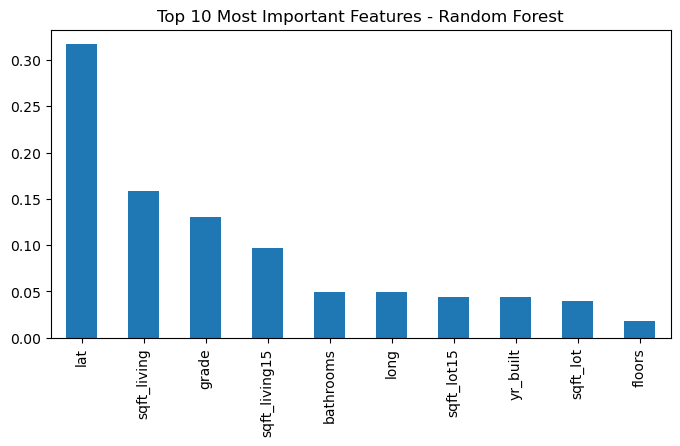

In [42]:
#evaluting feature importance
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Most Important Features - Random Forest")
plt.show()

### XGBoost

In [43]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)

XGBoost Performance:
MAE: 0.112
RMSE: 0.158
R²: 0.874


In [44]:
#Optimising the XGB parameters
xgb_opt = XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': [300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 3]
}

xgb_search = RandomizedSearchCV(
    xgb_opt,
    param_distributions=param_dist,
    n_iter=25,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train)
print("Best XGB params:", xgb_search.best_params_)
print("Best XGB RMSE:", -xgb_search.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best XGB params: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best XGB RMSE: 0.1630474194575686


In [45]:
#applying the optimised parameters in a model to predicted the test set
best_xgb = xgb_search.best_estimator_
xgb_opt_pred = best_xgb.predict(X_test)

In [46]:
#Evaluating metric
evaluate_model(y_test, xgb_opt_pred)

MAE: 0.114
RMSE: 0.159
R²: 0.872


### LightGBM regressor

In [47]:
lgb = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("LightGBM Performance:")
evaluate_model(y_test, y_pred_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1778
[LightGBM] [Info] Number of data points in the train set: 16373, number of used features: 15
[LightGBM] [Info] Start training from score 12.979261
LightGBM Performance:
MAE: 0.112
RMSE: 0.157
R²: 0.876


In [48]:
#optimising the LightGBM
lgb_opt = LGBMRegressor(random_state=42)

param_grid = {
    'num_leaves': [20, 31, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500, 800],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

lgb_search = RandomizedSearchCV(
    lgb_opt,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

lgb_search.fit(X_train, y_train)
print("Best LGBM params:", lgb_search.best_params_)
print("Best LGBM RMSE:", -lgb_search.best_score_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1778
[LightGBM] [Info] Number of data points in the train set: 16373, number of used features: 15
[LightGBM] [Info] Start training from score 12.979261
Best LGBM params: {'subsample': 1.0, 'num_leaves': 40, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best LGBM RMSE: 0.16106433072453266


In [49]:
#applying the optimised parameters in a model to predicted the test set
best_lgb = lgb_search.best_estimator_
lgb_opt_pred = best_lgb.predict(X_test)

In [50]:
#evaluating model
evaluate_model(y_test, lgb_opt_pred)

MAE: 0.111
RMSE: 0.157
R²: 0.876


### Neural Network

In [51]:
# Scale the data - neural networds are sensitive to feature scaling and as the variables considered in this analysis differ in scales I am going to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Define model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # single output neuron for regression
])

C:\Users\xeb15154\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Compile model
model.compile(
    optimizer='adam',
    loss='mse',  # mean squared error loss
    metrics=['mae']  # mean absolute error
)

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 15.6451 - mae: 2.4087 - val_loss: 1.5547 - val_mae: 0.9464
Epoch 2/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9869 - mae: 0.6743 - val_loss: 0.3679 - val_mae: 0.4331
Epoch 3/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2309 - mae: 0.3254 - val_loss: 0.1363 - val_mae: 0.2590
Epoch 4/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1120 - mae: 0.2405 - val_loss: 0.1258 - val_mae: 0.2527
Epoch 5/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0804 - mae: 0.2133 - val_loss: 0.0733 - val_mae: 0.1916
Epoch 6/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0672 - mae: 0.1938 - val_loss: 0.0745 - val_mae: 0.1906
Epoch 7/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0593 - mae: 0.1829 - val_loss: 0.0604 - val_mae: 0.1765
Epoch 8/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0569 - mae: 0.1786 - val_loss: 0.0583 - val_mae: 0.1786
Epoch 9/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0375 - mae: 0.1460 - val_loss: 0.0485 - val_mae: 0.1655
Epoch 55/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0360 - mae: 0.1418 - val_loss: 0.0330 - val_mae: 0.1366
Epoch 56/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0359 - mae: 0.1424 - val_loss: 0.0352 - val_mae: 0.1380
Epoch 57/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0368 - mae: 0.1429 - val_loss: 0.0518 - val_mae: 0.1848
Epoch 58/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0352 - mae: 0.1397 - val_loss: 0.0436 - val_mae: 0.1571
Epoch 59/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0325 - mae: 0.1342 - val_loss: 0.0324 - val_mae: 0.1316
Epoch 60/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0343 - mae: 0.1377 - val_loss: 0.0380 - val_mae: 0.1350
Epoch 61/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0342 - mae: 0.1380 - val_loss: 0.0515 - val_mae: 0.1629
Epoch 62/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

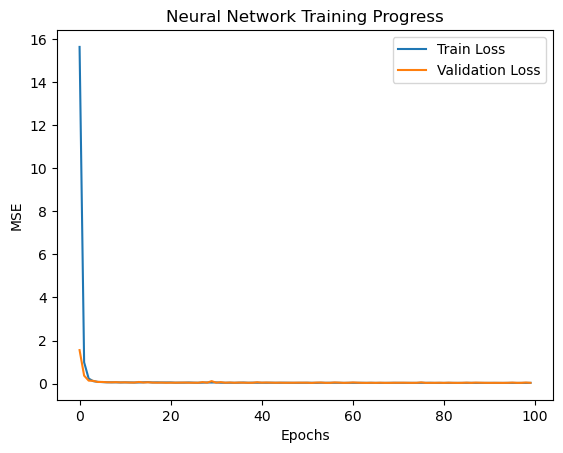

In [56]:
#Plotting training progress
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Neural Network Training Progress')
plt.show()

In [57]:
#revert predictions to normal values and evaluate peformance
y_pred_nn = model.predict(X_test_scaled).flatten()

evaluate_model(y_test, y_pred_nn)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
MAE: 0.136
RMSE: 0.184
R²: 0.829


### Optimising the neural net

In [ ]:
# Automated finetuning using keras tuner to find the optimal parameters and learning rate for the architecture

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    for i in range(hp.Int('layers', 2, 5)):
        model.add(layers.Dense(
            hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    
    model.add(layers.Dense(1))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('lr', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    directory='tuner_results',
    project_name='house_prices_nn'
)

tuner.search(X_train_scaled, y_train, validation_split=0.2, epochs=100)
best_model = tuner.get_best_models(1)[0]

Trial 8 Complete [00h 03m 20s]
val_loss: 0.041051045060157776

Best val_loss So Far: 0.028719058260321617
Total elapsed time: 8d 21h 39m 40s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
3                 |3                 |layers
512               |416               |units_0
0.2               |0.3               |dropout_0
192               |512               |units_1
0.5               |0.3               |dropout_1
0.0047516         |0.0011548         |lr
192               |32                |units_2
0.2               |0.1               |dropout_2
96                |None              |units_3
0.4               |None              |dropout_3
320               |None              |units_4
0.3               |None              |dropout_4

Epoch 1/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.4166 - mae: 1.8825 - val_loss: 8.8733 - val_mae: 2.8995
Epoch 2/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.7878 - mae: 1.3157 - val_loss: 1.4674 - 

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1050 - mae: 0.2499 - val_loss: 0.0807 - val_mae: 0.2113
Epoch 50/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1111 - mae: 0.2527 - val_loss: 0.0692 - val_mae: 0.1966
Epoch 51/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1022 - mae: 0.2454 - val_loss: 0.0777 - val_mae: 0.2095
Epoch 52/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1157 - mae: 0.2610 - val_loss: 0.0805 - val_mae: 0.2096
Epoch 53/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1083 - mae: 0.2544 - val_loss: 0.0821 - val_mae: 0.2203
Epoch 54/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1057 - mae: 0.2509 - val_loss: 0.0809 - val_mae: 0.2064
Epoch 55/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0977 - mae: 0.2388 - val_loss: 0.0708 - val_mae: 0.1950
Epoch 56/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0983 - mae: 0.2412 - val_loss: 0.0888 - val_mae: 0.2237
Epoch 57/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [ ]:
#evaluate and compare
y_pred_nn_opt = best_model.predict(X_test_scaled).flatten()
evalaute_model(y_test, y_pred_nn_opt)

### Ensemble Method: Stacking

## Comparing each models results

In [ ]:
#creating a list of each models output

models = {
    "Linear Regression": linear_regression_pred,
    "Ridge": ridge_pred,
    #"Lasso": y_pred_lasso,
    "Random Forest": y_pred_rf,
    "Random Forest Optimized": rf_opt_pred,
    "XGBoost": y_pred_xgb,
    "XGBoost Optimized": xgb_opt_pred,
    "LightGBM": y_pred_lgb,
    "LightGBM Optimized": lgb_opt_pred,
    "Neural Network": y_pred_nn,
    "Neural Network Optimized": y_pred_nn_opt
}

In [ ]:
# Collect metrics
results = []
for name, preds in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R²": r2})

df_results = pd.DataFrame(results).sort_values("RMSE")
display(df_results)